# Flyweight

## O que é?

O padrao _Flyweight_, é um _structural pattern_ baseado na ideia de compartilhar dados, entre objetos, com o objetivo de economizar memoria no sistema e permitir a existencia de um numero grande de objetos. O _Flyweight_ eh um objeto que armazena o _state_ permanente (_Intrinsic state_) e que pode ser compartilhado entre os objetos e que prove uma interface que possibilita a transmissao do _state_ variavel (_Extrinsic state_).

## Por quê?

As vezes uma aplicacao precisa de um numero muito alto de objetos (um editor de texto onde cada caractere eh um objeto) e isso seria proibitivo em termos de memoria, com o _Flyweight_ voce pode ter mais objetos do que seria recomendavel.

## Uso:

Voce deve usar o _Flyweight_ quando:
- A aplicacao usa um numero muito grande de objetos 
- Os custos de armazenamento estao altos devido ao grande numero de objetos
- A maioria dos objetos pode ser _extrinsic_
- Grandes grupos de objetos pode ser substituidos por um numero pequeno de objtos compartilhados (depois da remocao do _extrinsic state_ (o estado que varia por objeto))
- A aplicacao nao depende de identidade de objetos (com esse pattern objetos distintos seriam considerados iguais)

## Estrutura: 

![struct](https://upload.wikimedia.org/wikipedia/commons/4/4e/W3sDesign_Flyweight_Design_Pattern_UML.jpg)

## Exemplo:

Um exemplo simples do uso do _Chain of Responsibility_ eh uma calculadora. Cada vez que voce usa uma calculadora voce envia uma requisição de um calculo, um objeto composto por dois numeros e uma operacao, esse calculo pode ser executado por diversos objetos (dependendo da operacao desejada)
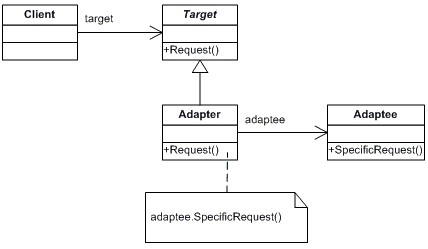

In [1]:
import json
from typing import Dict


class Flyweight():
    """
    The Flyweight stores a common portion of the state (also called intrinsic
    state) that belongs to multiple real business entities. The Flyweight
    accepts the rest of the state (extrinsic state, unique for each entity) via
    its method parameters.
    """

    def __init__(self, shared_state: str) -> None:
        self._shared_state = shared_state

    def operation(self, unique_state: str) -> None:
        s = json.dumps(self._shared_state)
        u = json.dumps(unique_state)
        print(f"Flyweight: Displaying shared ({s}) and unique ({u}) state.", end="")


class FlyweightFactory():
    """
    The Flyweight Factory creates and manages the Flyweight objects. It ensures
    that flyweights are shared correctly. When the client requests a flyweight,
    the factory either returns an existing instance or creates a new one, if it
    doesn't exist yet.
    """

    _flyweights: Dict[str, Flyweight] = {}

    def __init__(self, initial_flyweights: Dict) -> None:
        for state in initial_flyweights:
            self._flyweights[self.get_key(state)] = Flyweight(state)

    def get_key(self, state: Dict) -> str:
        """
        Returns a Flyweight's string hash for a given state.
        """

        return "_".join(sorted(state))

    def get_flyweight(self, shared_state: Dict) -> Flyweight:
        """
        Returns an existing Flyweight with a given state or creates a new one.
        """

        key = self.get_key(shared_state)

        if not self._flyweights.get(key):
            print("FlyweightFactory: Can't find a flyweight, creating new one.")
            self._flyweights[key] = Flyweight(shared_state)
        else:
            print("FlyweightFactory: Reusing existing flyweight.")

        return self._flyweights[key]

    def list_flyweights(self) -> None:
        count = len(self._flyweights)
        print(f"FlyweightFactory: I have {count} flyweights:")
        print("\n".join(map(str, self._flyweights.keys())), end="")


def add_car_to_police_database(
    factory: FlyweightFactory, plates: str, owner: str,
    brand: str, model: str, color: str
) -> None:
    print("\n\nClient: Adding a car to database.")
    flyweight = factory.get_flyweight([brand, model, color])
    # The client code either stores or calculates extrinsic state and passes it
    # to the flyweight's methods.
    flyweight.operation([plates, owner])


if __name__ == "__main__":
    """
    The client code usually creates a bunch of pre-populated flyweights in the
    initialization stage of the application.
    """

    factory = FlyweightFactory([
        ["Chevrolet", "Camaro2018", "pink"],
        ["Mercedes Benz", "C300", "black"],
        ["Mercedes Benz", "C500", "red"],
        ["BMW", "M5", "red"],
        ["BMW", "X6", "white"],
    ])

    factory.list_flyweights()

    add_car_to_police_database(
        factory, "CL234IR", "James Doe", "BMW", "M5", "red")

    add_car_to_police_database(
        factory, "CL234IR", "James Doe", "BMW", "X1", "red")

    print("\n")

    factory.list_flyweights()


FlyweightFactory: I have 5 flyweights:
Camaro2018_Chevrolet_pink
C300_Mercedes Benz_black
C500_Mercedes Benz_red
BMW_M5_red
BMW_X6_white

Client: Adding a car to database.
FlyweightFactory: Reusing existing flyweight.
Flyweight: Displaying shared (["BMW", "M5", "red"]) and unique (["CL234IR", "James Doe"]) state.

Client: Adding a car to database.
FlyweightFactory: Can't find a flyweight, creating new one.
Flyweight: Displaying shared (["BMW", "X1", "red"]) and unique (["CL234IR", "James Doe"]) state.

FlyweightFactory: I have 6 flyweights:
Camaro2018_Chevrolet_pink
C300_Mercedes Benz_black
C500_Mercedes Benz_red
BMW_M5_red
BMW_X6_white
BMW_X1_red

## Prós e contras:

### Prós

- Reducao no numero de objetos
- Reducao no consumo de memoria da aplicacao (essa reducao eh proporcional ao quanto o _flyweight_ eh compartilhado)


### Contras

- Aumento da complexidade (tipica otimizacao precoce)
- Esse pattern pode introduzir aumento do custo de processamento (CPU x RAM) associado a busca, transferencia de estates compartilhados (especialmente se forem _intrinsic state_)



## Discussao:

Part 1: Fale um exemplo de _flyweight_ que nao seja relacionado a uma GUI (_graphical user interface_)

Part 2: What is the minimum configuration for using flyweight? Do you need to be working with thousands of objects, hundreds, tens?

 